In [227]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [228]:
df = pd.read_csv('csgo_round_snapshots.csv')
df.head(5).T

,0,1,2,3,4
time_left,175.0,156.03,96.03,76.03,174.97
ct_score,0.0,0.0,0.0,0.0,1.0
t_score,0.0,0.0,0.0,0.0,0.0
map,de_dust2,de_dust2,de_dust2,de_dust2,de_dust2
bomb_planted,False,False,False,False,False
...,...,...,...,...,...
ct_grenade_molotovgrenade,0.0,0.0,0.0,0.0,0.0
t_grenade_molotovgrenade,0.0,0.0,0.0,0.0,0.0
ct_grenade_decoygrenade,0.0,0.0,0.0,0.0,0.0
t_grenade_decoygrenade,0.0,0.0,0.0,0.0,0.0


In [229]:
df['round_winner'].value_counts() # 'value_counts' gives us the count of the unique values that are present in a column.
                                  # To balance the data we use oversampling technique as losing data should be your last resort.

round_winner
T     62406
CT    60004
Name: count, dtype: int64

In [230]:
df.shape

(122410, 97)

In [231]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122410 entries, 0 to 122409
Data columns (total 97 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   time_left                     122410 non-null  float64
 1   ct_score                      122410 non-null  float64
 2   t_score                       122410 non-null  float64
 3   map                           122410 non-null  object 
 4   bomb_planted                  122410 non-null  bool   
 5   ct_health                     122410 non-null  float64
 6   t_health                      122410 non-null  float64
 7   ct_armor                      122410 non-null  float64
 8   t_armor                       122410 non-null  float64
 9   ct_money                      122410 non-null  float64
 10  t_money                       122410 non-null  float64
 11  ct_helmets                    122410 non-null  float64
 12  t_helmets                     122410 non-nul

In [232]:
df.describe()

,time_left,ct_score,t_score,ct_health,t_health,ct_armor,t_armor,ct_money,t_money,ct_helmets,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
count,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,...,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000,122410.000000
mean,97.886922,6.709239,6.780435,412.106568,402.714500,314.142121,298.444670,9789.023773,11241.036680,2.053901,...,1.853157,1.858100,1.540814,1.627146,1.001969,0.019819,0.048011,1.352095,0.027694,0.025750
std,54.465238,4.790362,4.823543,132.293290,139.919033,171.029736,174.576545,11215.042286,12162.806759,1.841470,...,1.772791,1.794473,1.737804,1.829147,1.458084,0.143933,0.227669,1.663246,0.169531,0.164162
min,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,54.920000,3.000000,3.000000,350.000000,322.000000,194.000000,174.000000,1300.000000,1550.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,94.910000,6.000000,6.000000,500.000000,500.000000,377.000000,334.000000,5500.000000,7150.000000,2.000000,...,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,166.917500,10.000000,10.000000,500.000000,500.000000,486.000000,468.000000,14600.000000,18000.000000,4.000000,...,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000
max,175.000000,32.000000,33.000000,500.000000,600.000000,500.000000,500.000000,80000.000000,80000.000000,5.000000,...,7.000000,7.000000,6.000000,9.000000,5.000000,3.000000,3.000000,5.000000,3.000000,2.000000


In [233]:
df.describe(include = 'O')

,map,round_winner
count,122410,122410
unique,8,2
top,de_inferno,T
freq,23811,62406


In [234]:
df.isnull().sum().sum()

0

In [235]:
# Every game has a theme that players most prefer while playing. It's kind of a background for their current round.
df['map'].value_counts()

map
de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: count, dtype: int64

In [236]:
# Calculating the percentage of the most preferred map during gameplay.
# First, identify the different map types present in the game of interest. Then,
# find the individual count of each map.
# find the total count of the maps.
# Determine the percentage of each map relative to the total number of maps.
# This provides a clear view of the map that was most favored by gaming enthusiasts.

# To find individual count of a map
map_counts = df['map'].value_counts() # This gives us all the unique values in the map column along with its counts

# To find total count of maps(combined)
total_maps = map_counts.sum()

#To find percentage of each map relative to the total number of maps
individual_map_percent = map_counts/total_maps*100

for maptitles, mapcounts, mappercent in zip(map_counts.index, map_counts.values, individual_map_percent.values):
    print(f'{maptitles}:{mappercent:.2f}%','/',mapcounts)


de_inferno:19.45% / 23811
de_dust2:18.09% / 22144
de_nuke:15.54% / 19025
de_mirage:15.18% / 18576
de_overpass:11.50% / 14081
de_train:11.02% / 13491
de_vertigo:9.10% / 11137
de_cache:0.12% / 145


In [237]:
Cities = ['Delhi', 'Dehradun', 'Pune']
States = ['NCT', 'Uttarakhand','Maharashtra']
pack = zip(Cities, States)
list(pack)

[('Delhi', 'NCT'), ('Dehradun', 'Uttarakhand'), ('Pune', 'Maharashtra')]

Text(0.5, 1.0, 'Individual map percentage numbers')

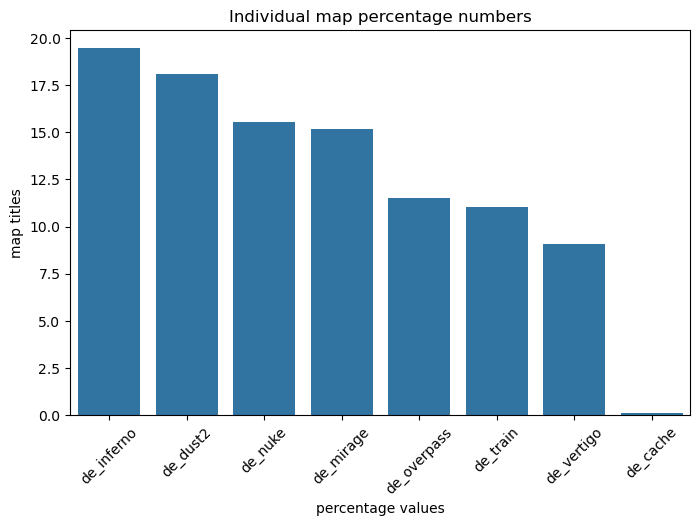

In [238]:
plt.figure(figsize = (8,5))
sns.barplot(x=map_counts.index, y=individual_map_percent.values)
plt.xticks(rotation = 45)
plt.xlabel('percentage values')
plt.ylabel('map titles')
plt.title('Individual map percentage numbers')

In [239]:
# The objective of any type of encoding is to convert the 'Categorical' data into 'numerical data'.
# Ordinal encoding = ranking order wise.
# example: consider ranges of temperature as 'High', 'Medium', 'Low'. High will have the higher order as 2, medicum=1, low=0.
# Label encoding is best suited for 'binary' variables especially 'Target' colum as it does not have any direct bearing on data.


In [240]:
for i in df.columns:
    if (df[i].dtype=='object')|(df[i].dtypes=='bool'):
        print(f'columns with categorical values',i)

columns with categorical values map
columns with categorical values bomb_planted
columns with categorical values round_winner


In [241]:
df['map'].value_counts()

map
de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: count, dtype: int64

In [242]:
df['bomb_planted'].value_counts()

bomb_planted
False    108726
True      13684
Name: count, dtype: int64

In [243]:
df['round_winner'].value_counts()

round_winner
T     62406
CT    60004
Name: count, dtype: int64

In [244]:
from sklearn.preprocessing import LabelEncoder

In [245]:
le=LabelEncoder()
df['map'] = le.fit_transform(df['map'])
df['bomb_planted'] = le.fit_transform(df['bomb_planted'])
df['round_winner'] = le.fit_transform(df['round_winner'])

In [246]:
df.head(5)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,76.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,174.97,1.0,0.0,1,0,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [247]:
x = df.drop('round_winner', axis = 1)

In [248]:
x.head(3)

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,ct_grenade_flashbang,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade
0,175.00,0.0,0.0,1,0,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,156.03,0.0,0.0,1,0,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
2,96.03,0.0,0.0,1,0,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [249]:
y = df[['round_winner']]

In [250]:
y.head(3)

,round_winner
0,0
1,0
2,0


In [251]:
from sklearn.model_selection import train_test_split

In [252]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 42)

In [253]:
x_train.shape

(97928, 96)

In [254]:
y_train.shape

(97928, 1)

In [255]:
# How to decide when to use Normalization or Standardisation?
# Ans--> If the presence of outliers is not checked at the beggining(during EDA) it is safe to assume the data has outliers.
# Normalisation is sensitive to outliers. As such, it's the best bet to use the StandardScaling then.
# If the outliers have already been removed from the data of interest, then 'Normalization' technique can be used.

#### Scaling the train data

In [256]:
from sklearn.preprocessing import StandardScaler

In [257]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

#### Applying Linear Discriminant Analysis

In [258]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [259]:
LDA = LinearDiscriminantAnalysis()
LDA.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LinearDiscriminantAnalysis()

In [260]:
LDA.transform(x_test)

array([[-0.31066701],
       [ 0.16160545],
       [-2.19522227],
       ...,
       [ 2.91456775],
       [-1.65102466],
       [ 0.99528168]])

#### Obtaining LDA coefficients

In [261]:
# obtaining LDA coefficients helps us determine important scores associated with each feature.
LDA_coef = np.exp(np.abs(LDA.coef_)) # abs helps us get just the magnitude irrespective of their sign'+ve' or '-Ve'.
LDA_coef                             # 'exp' converts any real value to a positive value.

array([[1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
        1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
        1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
        1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
        1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
        1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
        1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
        1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
        1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
        1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
        1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
        1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
        1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
        1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
        1.0223457 , 1.00392739, 1.00787732, 1.06

In [262]:
LDA_coef = LDA_coef.flatten() # flatten reduces the dimension. If it's in 2D, it's changed to 1D.

In [263]:
LDA_coef

array([1.14051375, 1.02348232, 1.02361012, 1.08711166, 1.26443741,
       1.56896428, 1.42226149, 1.71174795, 1.72149378, 1.22695841,
       1.17629264, 1.02925519, 1.17393359, 1.01233178, 1.17701202,
       1.26888831, 1.21975251, 1.80580698, 1.22872837, 1.03124048,
       1.37208174, 1.26351299, 1.        , 1.00130014, 1.00099319,
       1.03406233, 1.01079854, 1.01589366, 1.1511331 , 1.0481572 ,
       1.        , 1.01891369, 1.04559279, 1.13912974, 1.02386319,
       1.01009894, 1.        , 1.        , 1.10758456, 1.051198  ,
       1.62280372, 1.10928011, 1.01408145, 1.11733322, 1.02306813,
       1.00594113, 1.01383628, 1.04016588, 1.00546389, 1.00296978,
       1.1231047 , 1.0350133 , 1.        , 1.00757676, 1.02090408,
       1.00405543, 1.0252188 , 1.01962772, 1.        , 1.00493109,
       1.        , 1.01827676, 1.00401758, 1.01179667, 1.24546089,
       1.71649302, 1.08595734, 1.01928052, 1.05378886, 1.0817296 ,
       1.0223457 , 1.00392739, 1.00787732, 1.06560713, 1.02458

In [264]:
x.shape

(122410, 96)

In [265]:
numeric_feat = x.shape[1]

In [266]:
numeric_feat

96

In [272]:
feature_indices

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95])

In [273]:
feature_names = list(x.columns)

#### Checking columns with high score through visualisation

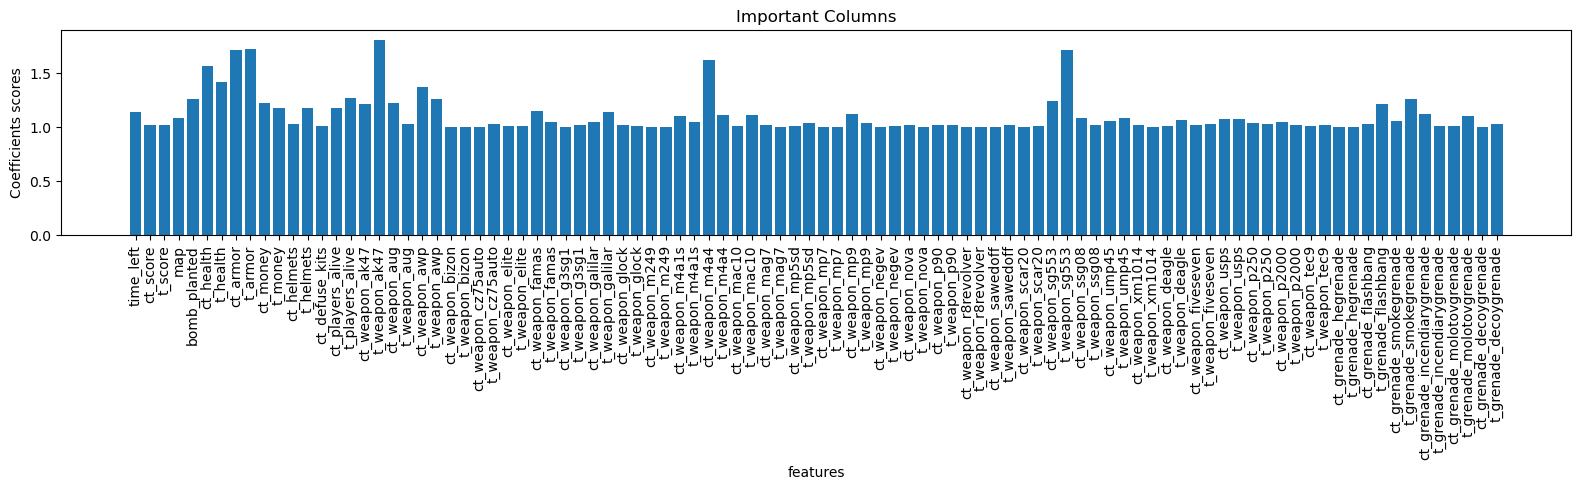

In [276]:
plt.figure(figsize = (16,5))
plt.bar(feature_indices, LDA_coef)
plt.xticks(feature_indices, feature_names, rotation = 90)
plt.xlabel('features')
plt.ylabel('Coefficients scores')
plt.title('Important Columns')
plt.tight_layout()
plt.show()

In [278]:
df_scores = pd.DataFrame({'feature_names':feature_names,'feature_scores':LDA_coef})
df_scores.head(3)

,feature_names,feature_scores
0,time_left,1.140514
1,ct_score,1.023482
2,t_score,1.023610


In [284]:
# Getting top 20 columns with highest coefficient scores
top_scores_df = df_scores.sort_values(by=['feature_scores'], ascending = False).head(20)
top_scores_df

,feature_names,feature_scores
17,t_weapon_ak47,1.805807
8,t_armor,1.721494
65,t_weapon_sg553,1.716493
7,ct_armor,1.711748
40,ct_weapon_m4a4,1.622804
5,ct_health,1.568964
6,t_health,1.422261
20,ct_weapon_awp,1.372082
15,t_players_alive,1.268888
4,bomb_planted,1.264437


In [285]:
top_scores_df.index

Index([17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14, 10,
       12],
      dtype='int64')

In [286]:
x_train = x_train[:,[17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14, 10, 12]]

In [287]:
x_test = x_test[:,[17, 8, 65, 7, 40, 5, 6, 20, 15, 4, 89, 21, 64, 18, 9, 16, 87, 14, 10, 12]]

#### Running Algorithms

In [289]:
from sklearn.linear_model import LogisticRegression

In [290]:
lr = LogisticRegression()

In [292]:
lr.fit(x_train,y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [294]:
y_pred = lr.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [296]:
from sklearn.metrics import *

In [304]:
classification_report(y_test, y_pred)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.74      0.76      0.75     12004
           1       0.76      0.74      0.75     12478

    accuracy                           0.75     24482
   macro avg       0.75      0.75      0.75     24482
weighted avg       0.75      0.75      0.75     24482



#### Running Decision Tree Classifier

In [305]:
from sklearn.tree import DecisionTreeClassifier

In [306]:
dt = DecisionTreeClassifier()

In [307]:
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [308]:
y_pred = dt.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [309]:
classification_report(y_test, y_pred)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81     12004
           1       0.82      0.82      0.82     12478

    accuracy                           0.82     24482
   macro avg       0.82      0.82      0.82     24482
weighted avg       0.82      0.82      0.82     24482



#### Running Random Forest Classifier

In [312]:
from sklearn.ensemble import RandomForestClassifier

In [313]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [314]:
y_pred = rf.predict(x_test)
y_pred

array([0, 1, 0, ..., 1, 0, 1])

In [316]:
classification_report(y_test, y_pred)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85     12004
           1       0.86      0.86      0.86     12478

    accuracy                           0.86     24482
   macro avg       0.86      0.86      0.86     24482
weighted avg       0.86      0.86      0.86     24482

